In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt #Both these packages help in visualization

In [3]:
data = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Step 1: Exploratory Data Analysis**
 

info() function gives the summary of the columns in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


describe() function provides a summary of central tendency, dispersion, and shape of the distribution of a dataset. The output includes various statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Find the records with missing values and remove them

In [6]:
data.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Step 2: Data Visualization**

Visualize the dataset for potability

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

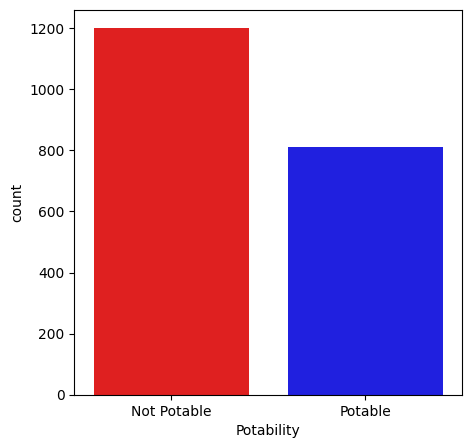

In [8]:

plt.figure(figsize=(5, 5))
colors = ['red', 'blue'] 
sns.countplot(x=data["Potability"], palette=colors)
plt.xticks(ticks=[0, 1], labels=['Not Potable', 'Potable'])
plt.show()

Correlation is a statistical measure that quantifies the extent to which two variables change together. In other words, it assesses the strength and direction of a linear relationship between two numerical variables. The correlation coefficient ranges from -1 to 1, where:

* 1 indicates a perfect positive correlation (as one variable increases, the other also increases)
* -1 indicates a perfect negative correlation (as one variable increases, the other decreases)
* 0 indicates no linear correlation.

corr() function privides correlation between the features in dataset.

In [9]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


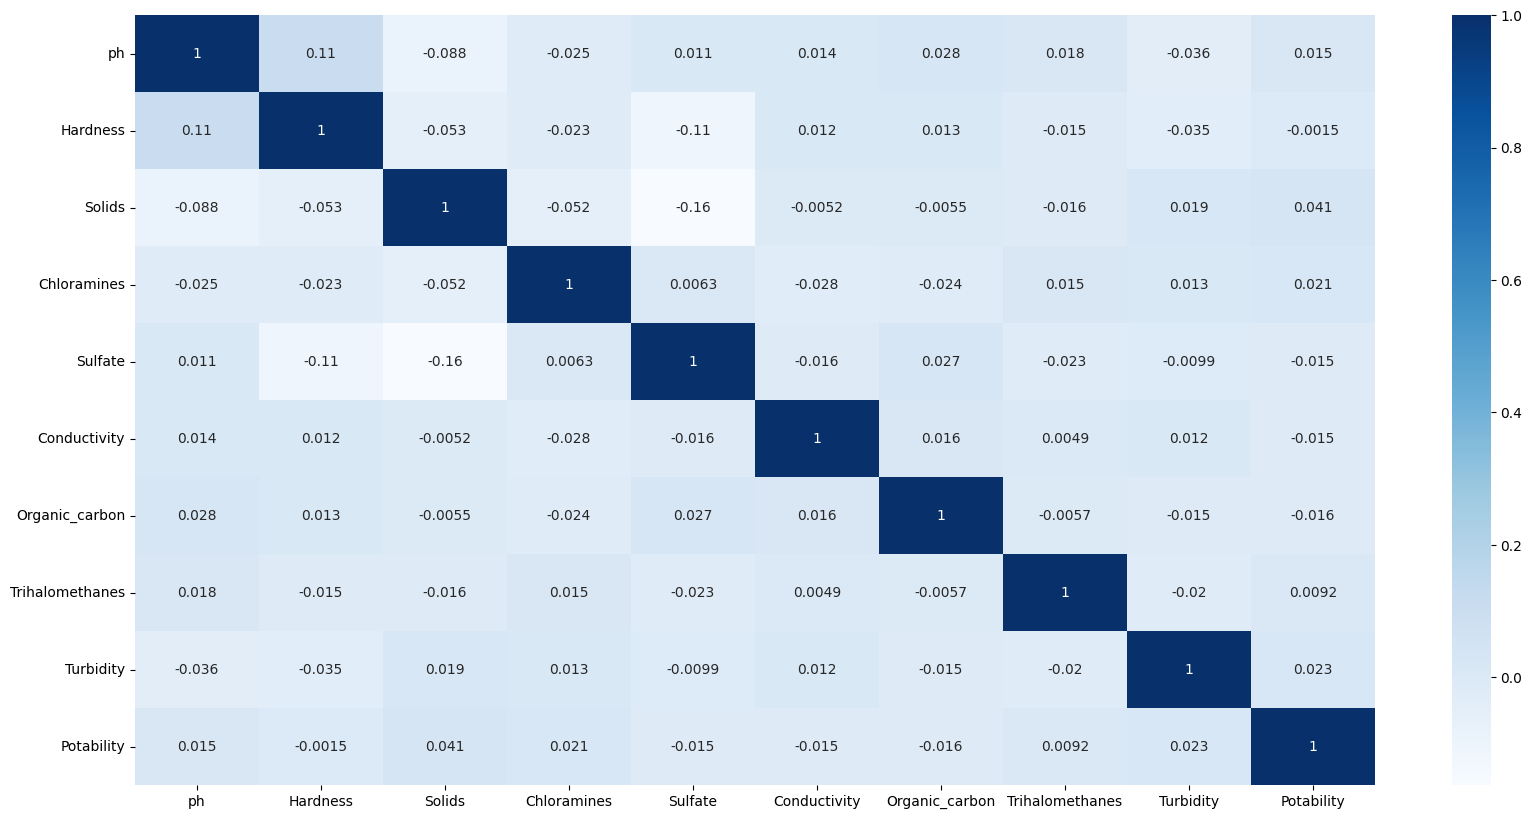

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

Lets try to predict water potability using simpler models like logistic regression and Decision tree

# **Step 3 : Using Machine Learning Model**

**Logistic Regression**

Logistic Regression is a binary classification algorithm used to predict the probability of an instance belonging to a particular class. It models the relationship between independent variables and the log-odds of the dependent variable, employing the logistic function to ensure predicted probabilities lie between 0 and 1.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
X = data.iloc[:,:-1] #independent variables first to second last column
y = data.iloc[:,-1] # dependent variable last column i.e. Portability

In [13]:
y


3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
lr_pred = model.predict(X_test)

Evaluate the model

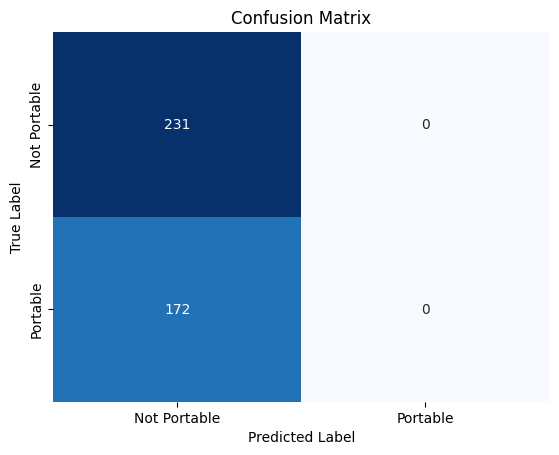

In [15]:
lr_matrix= confusion_matrix(y_test, lr_pred)

sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            
            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(classification_report(y_test, lr_pred,  zero_division=0))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403



**Decision Tree**

Decision tree in machine learning is a predictive model that maps features to outcomes by recursively splitting data based on attribute values. It organizes decisions in a tree-like structure, making it easy to interpret and implement. Nodes represent decision points, branches represent outcomes, and leaves contain final predictions or classifications.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

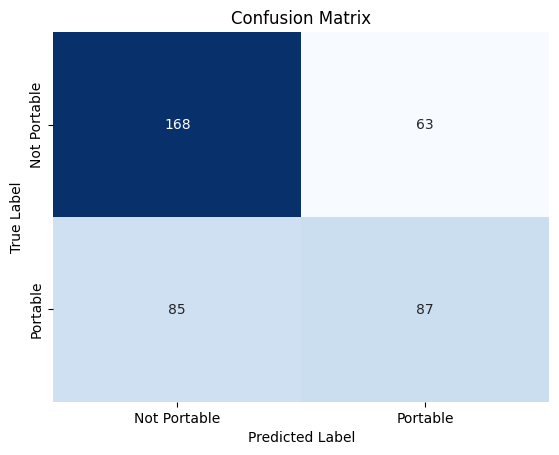

In [19]:
clf_matrix= confusion_matrix(y_test, clf_pred)

sns.heatmap(clf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            
            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(y_test, clf_pred,  zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       231
           1       0.58      0.51      0.54       172

    accuracy                           0.63       403
   macro avg       0.62      0.62      0.62       403
weighted avg       0.63      0.63      0.63       403



Lets try predicting using more complex models like Random Forest Classifier and support vector machines.

**Random Forest Classifier**

Random Forest Classifier is an ensemble learning algorithm that builds multiple decision trees through bagging and feature randomization. It aggregates their predictions to enhance accuracy and reduce overfitting. Suitable for classification tasks, it delivers robust results by combining diverse trees, each trained on a subset of data and features.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)



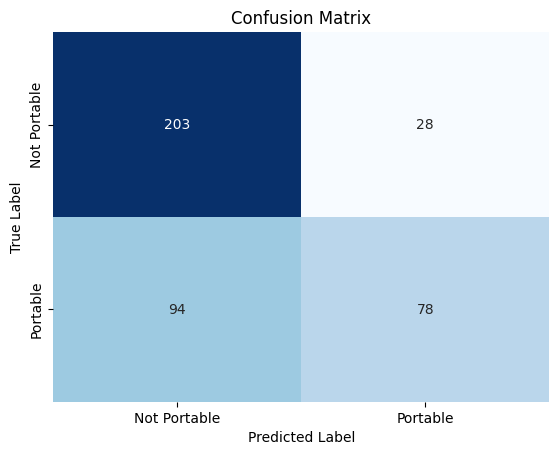

In [23]:
rf_matrix = confusion_matrix(y_test, rf_pred)

sns.heatmap(rf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            
            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test, rf_pred,  zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       231
           1       0.74      0.45      0.56       172

    accuracy                           0.70       403
   macro avg       0.71      0.67      0.67       403
weighted avg       0.71      0.70      0.68       403



# **Support Vector Machine**


Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates data into different classes. SVM maximizes the margin between classes and is effective in high-dimensional spaces. It can handle linear and non-linear relationships.

In [25]:
from sklearn.svm import SVC

In [26]:
svm_classifier = SVC(kernel='linear',degree=3) 

svm_classifier.fit(X_train, y_train)


svm_pred = svm_classifier.predict(X_test)


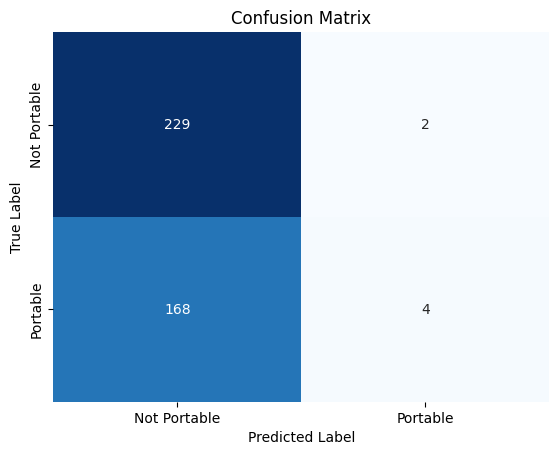

In [27]:
svm_matrix = confusion_matrix(y_test, svm_pred)

sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            
            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test, svm_pred,  zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       231
           1       0.67      0.02      0.04       172

    accuracy                           0.58       403
   macro avg       0.62      0.51      0.39       403
weighted avg       0.62      0.58      0.44       403



# **Conclusion**

Based on the observation made from the confusion matrix. We need to minimize the number of prediction false predicted as portable but in actual not portable. As this can adverse impact the heath of the consumer.Also we need to choose the model which is able to correctly predict for most number of records.
We will use accuracy as the metric to determine the most suitable model for making the prediction.

          Logistic Regression  Decision Tree  Random Forest  Support Vector
Accuracy            57.320099      63.275434      69.727047       57.816377


<Axes: >

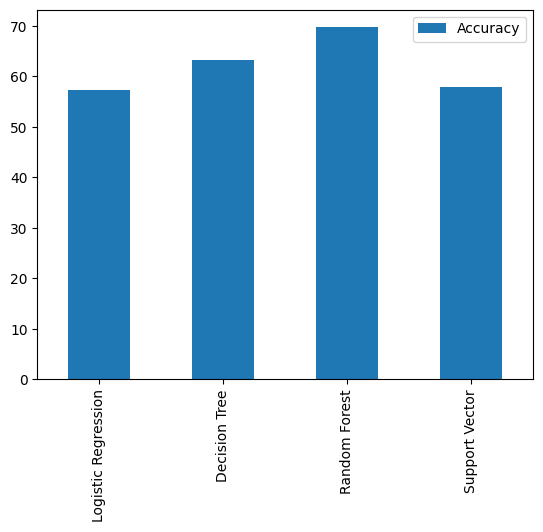

In [29]:
from sklearn.metrics import accuracy_score
model_scores = {'Logistic Regression': accuracy_score(y_test, lr_pred)*100,
'Decision Tree': accuracy_score(y_test, clf_pred)*100,
'Random Forest': accuracy_score(y_test, rf_pred)*100,
'Support Vector': accuracy_score(y_test, svm_pred)*100}
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
print(model_compare)
model_compare.T.plot(kind='bar')

As you can see the above chart, **Random Forest Classifier** is the most suitable machine learning model for making the prediction with **69.72%**.